---
### Load Libraries
---

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from patsy import dmatrices
from plotnine import *
import statsmodels.api as sm
import os
from pathlib import Path
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import logistic
from scipy.stats import norm
from stargazer.stargazer import Stargazer
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss

warnings.filterwarnings("ignore")



--- 
# Load Data and Inspect
---

### Loading Data and Visualizing the Head
---

In [5]:
# Step 1: Load and Inspect Data
data = pd.read_csv('cardio_fitness.csv')
print("Data Head of the Cardio Fitness Dataset:")
print("-"*55)
print(data.head())
print("\n" + "-"*55 + "\n")
print("\nBasic Info about the Cardio Fitness Dataset:")
print("-"*55)
print(data.info())


Data Head of the Cardio Fitness Dataset:
-------------------------------------------------------
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

-------------------------------------------------------


Basic Info about the Cardio Fitness Dataset:
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    

### Checking for Missing Values
---

In [6]:
# Handle missing values or incorrect data types here (if any)
missing_values = data.isnull().sum()
print("Number of missing values in the Cardio Fitness Dataset:\n")
print(missing_values)


Number of missing values in the Cardio Fitness Dataset:

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


---
# Descriptive Statistics
---

### Individual Variable Descriptives
---

In [7]:
# Step 3: Descriptive Statistics
# Continuous variables
print("Descriptive Statistics for Continuous Variables:\n")
print(data.describe())
print("\n" + "-"*50 + "\n")

# Categorical variables
print("Value Counts for Categorical Variables:")
for column in ['Product', 'Gender', 'MaritalStatus']:
    print(f"\nValue counts for {column}:")
    print(data[column].value_counts())


Descriptive Statistics for Continuous Variables:

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  

--------------------------------------------------

Value Counts for Categorical Variables:

Value counts for Product:
P

### Variable Descriptive Visualizations
---

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


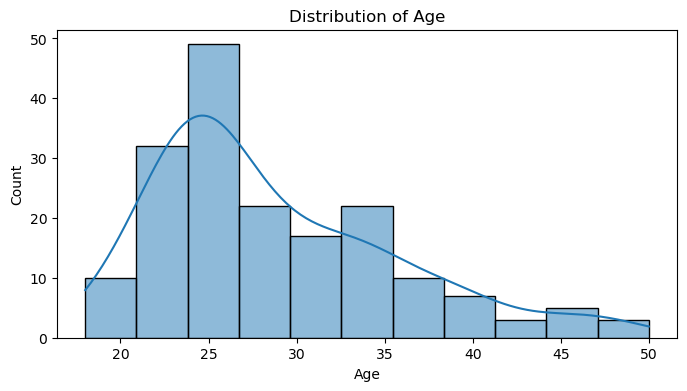

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


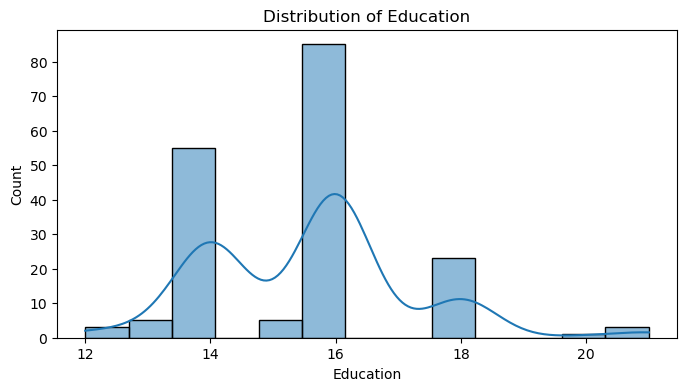

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


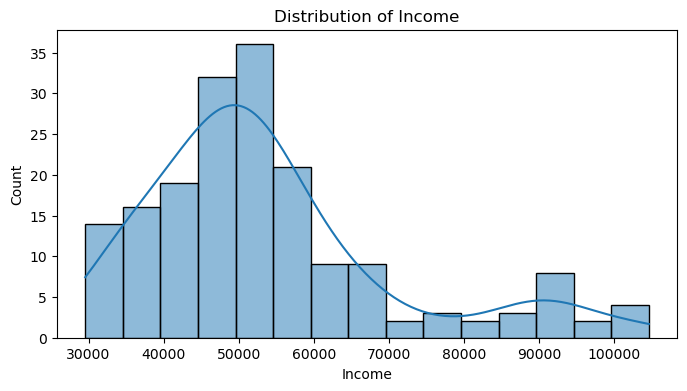

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


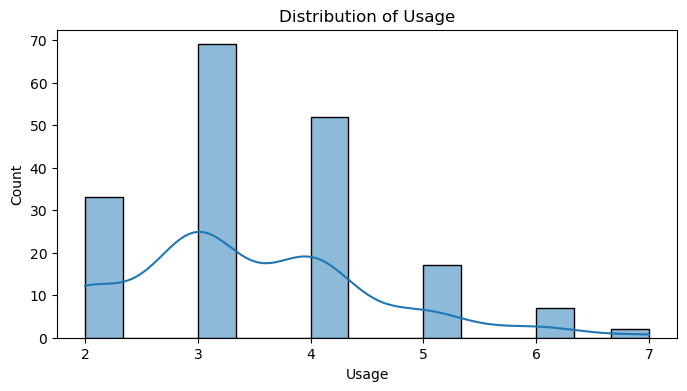

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


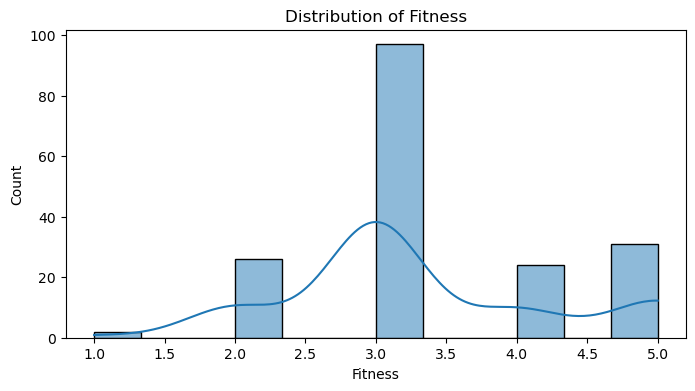

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


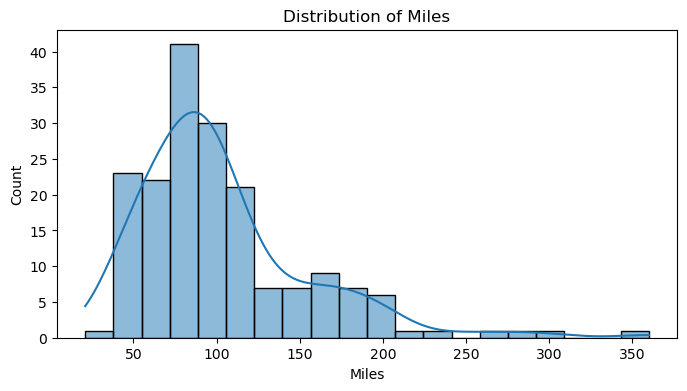

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


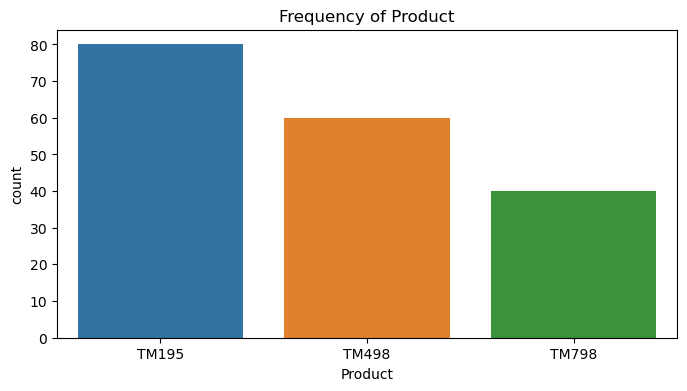

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


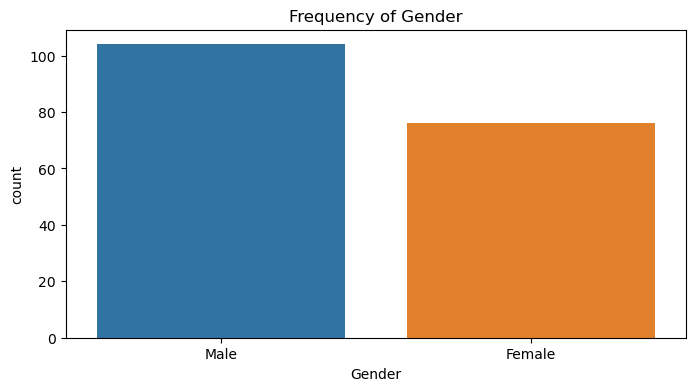

C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\iandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


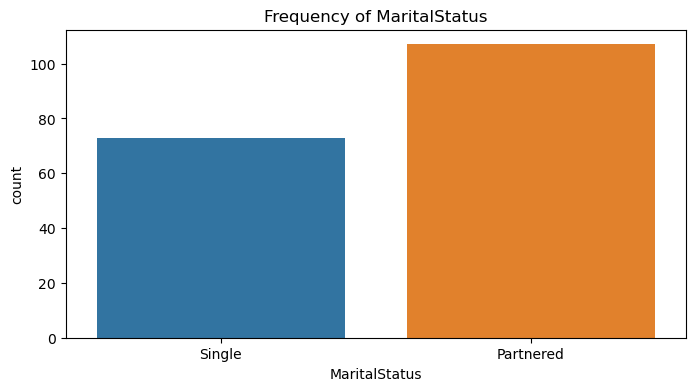

In [8]:
# Step 4: Data Visualization
# Continuous Variables
continuous_vars = ['Age', 'Education', 'Income', 'Usage', 'Fitness', 'Miles']
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

# Categorical Variables
categorical_vars = ['Product', 'Gender', 'MaritalStatus']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=var)
    plt.title(f'Frequency of {var}')
    plt.show()
    

### Descriptive Customer Profile Analysis
---

In [9]:
# Analyze descriptives for each product separately
products = data['Product'].unique()
for product in products:
    print(f'\nProfile for {product} customers:\n')
    subset = data[data['Product'] == product]
    print(subset.describe(include='all'))
    print("\n" + "-"*50)
    


Profile for TM195 customers:

       Product        Age Gender  Education MaritalStatus      Usage  \
count       80  80.000000     80  80.000000            80  80.000000   
unique       1        NaN      2        NaN             2        NaN   
top      TM195        NaN   Male        NaN     Partnered        NaN   
freq        80        NaN     40        NaN            48        NaN   
mean       NaN  28.550000    NaN  15.037500           NaN   3.087500   
std        NaN   7.221452    NaN   1.216383           NaN   0.782624   
min        NaN  18.000000    NaN  12.000000           NaN   2.000000   
25%        NaN  23.000000    NaN  14.000000           NaN   3.000000   
50%        NaN  26.000000    NaN  16.000000           NaN   3.000000   
75%        NaN  33.000000    NaN  16.000000           NaN   4.000000   
max        NaN  50.000000    NaN  18.000000           NaN   5.000000   

         Fitness       Income       Miles  
count   80.00000     80.00000   80.000000  
unique       NaN

---
# Regression Analysis
---

### Create Dummy Variables for Regression Analysis
---

In [10]:
data["Female"] = (data["Gender"] == "Female").astype(int)
data["Partnered"] = (data["MaritalStatus"] == "Partnered").astype(int)
data["TM195"] = (data["Product"] == "TM195").astype(int)
data["TM498"] = (data["Product"] == "TM498").astype(int)
data["TM798"] = (data["Product"] == "TM798").astype(int)
data['lnIncome'] = np.log(data['Income'])
data['lnMiles'] = np.log(data['Miles'])


### TM195 Customer Profile
---


-------------------------------------------------------

LPM Predtive Probability Descriptives:
count    180.0000
mean       0.4444
std        0.2377
min       -0.1935
25%        0.3537
50%        0.4987
75%        0.6136
max        0.8722
Name: pred_lpm, dtype: float64

-------------------------------------------------------

Logit Predtive Probability Descriptives:
count    180.000000
mean       0.444444
std        0.245476
min        0.010540
25%        0.278726
50%        0.476393
75%        0.638279
max        0.903027
Name: pred_logit, dtype: float64

-------------------------------------------------------

Optimization terminated successfully.
         Current function value: 0.547044
         Iterations 7

-------------------------------------------------------

                           Logit Regression Results                           
Dep. Variable:                  TM195   No. Observations:                  180
Model:                          Logit   Df Residuals:       

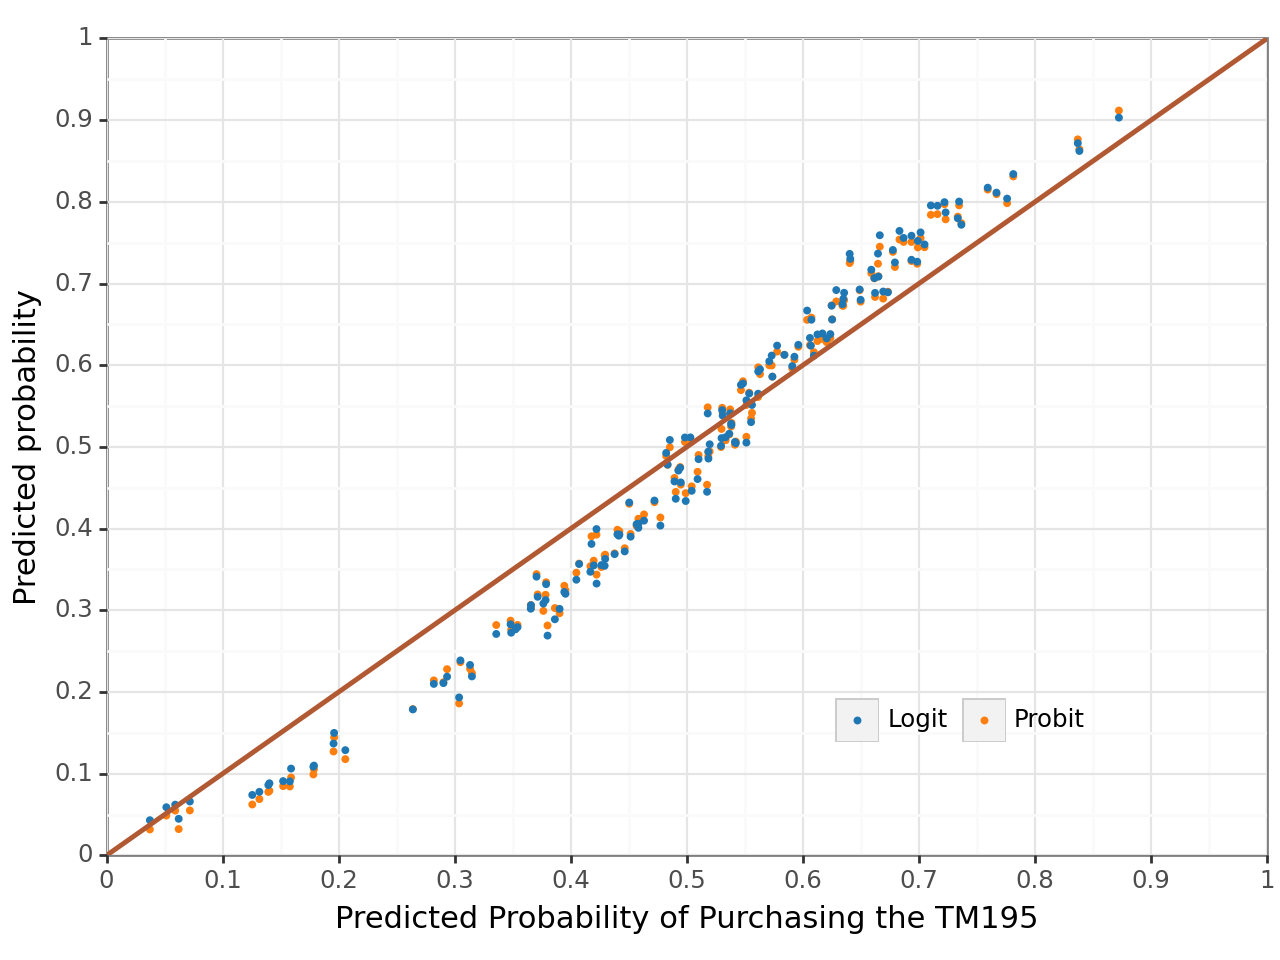

In [17]:
# Conducting the LPM
lpm1 = smf.ols(
    "TM195 ~ Female + Age + Education + Partnered + Usage + Fitness + lnIncome + lnMiles",
    data = data,
).fit(covtype="HC1")

# LPM predictive descriptives
data["pred_lpm"] = lpm1.predict()
print("\n" + "-"*55 + "\n")
print("LPM Predtive Probability Descriptives:")
print(data["pred_lpm"].describe().round(4))

# Logit Model
y, X = dmatrices(
    "TM195 ~ Female + Age + Education + Partnered + Usage + Fitness + lnIncome + lnMiles",
    data,
)

logit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit = logit.fit()

data["pred_logit"] = logit.predict()
print("\n" + "-"*55 + "\n")
print("Logit Predtive Probability Descriptives:")
print(data["pred_logit"].describe())
print("\n" + "-"*55 + "\n")

logit = sm.Logit(y, X)
logit_result = logit.fit()
print("\n" + "-"*55 + "\n")

print(logit_result.summary())
logit_margef_results = logit_result.get_margeff()
print("\n" + "-"*55 + "\n")
print(logit_margef_results.summary())
print("\n" + "-"*55 + "\n")


# Probit Model
probit = sm.Probit(y, X)
probit_result = probit.fit()
print("\n" + "-"*55 + "\n")
print(probit_result.summary())

print("Probit Predtive Probability Descriptives:")
data["pred_probit"] = probit_result.predict()
print(data["pred_probit"].describe())
print("\n" + "-"*55 + "\n")

probit_margef_results = probit_result.get_margeff()
print("\n" + "-"*55 + "\n")
print(probit_margef_results.summary())
print("\n" + "-"*55 + "\n")


# LPM, Logit, Probit Plot
df_plot = pd.melt(
    data[["pred_lpm", "pred_logit", "pred_probit"]].rename(
        columns={"pred_logit": "Logit", "pred_probit": "Probit"}
    ),
    value_vars=["Logit", "Probit"],
    id_vars=["pred_lpm"],
).sort_values(by=["variable"], ascending=False)


color = ["#1f77b4", "#ff7f0e", "#b15933"]

g1 = (
    ggplot(df_plot, aes(x="pred_lpm", y="value", color="variable"))
    + geom_point(size=0.6)
    + geom_abline(color=color[2], intercept=0, slope=1, size=1)
    + labs(
        x="Predicted Probability of Purchasing the TM195", y="Predicted probability"
    )
    + scale_y_continuous(expand=[0.00, 0.0], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + scale_x_continuous(expand=[0.00, 0.0], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + scale_color_manual(values=[color[0], color[1]])
    + theme_bw()
    + theme(
        legend_title=element_blank(),
        legend_direction="horizontal",
        legend_position=(0.75, 0.25),
        legend_background=element_blank(),
    )
)
print(g1)


### TM498 Customer Profile
---


-------------------------------------------------------

LPM Predtive Probability Descriptives:
count    180.0000
mean       0.3333
std        0.1701
min       -0.1878
25%        0.2691
50%        0.3814
75%        0.4446
max        0.6436
Name: pred_lpm, dtype: float64

-------------------------------------------------------

Logit Predtive Probability Descriptives:
count    180.000000
mean       0.333333
std        0.176444
min        0.013968
25%        0.211577
50%        0.353976
75%        0.461800
max        0.743453
Name: pred_logit, dtype: float64

-------------------------------------------------------

Optimization terminated successfully.
         Current function value: 0.558065
         Iterations 6

-------------------------------------------------------

                           Logit Regression Results                           
Dep. Variable:                  TM498   No. Observations:                  180
Model:                          Logit   Df Residuals:       

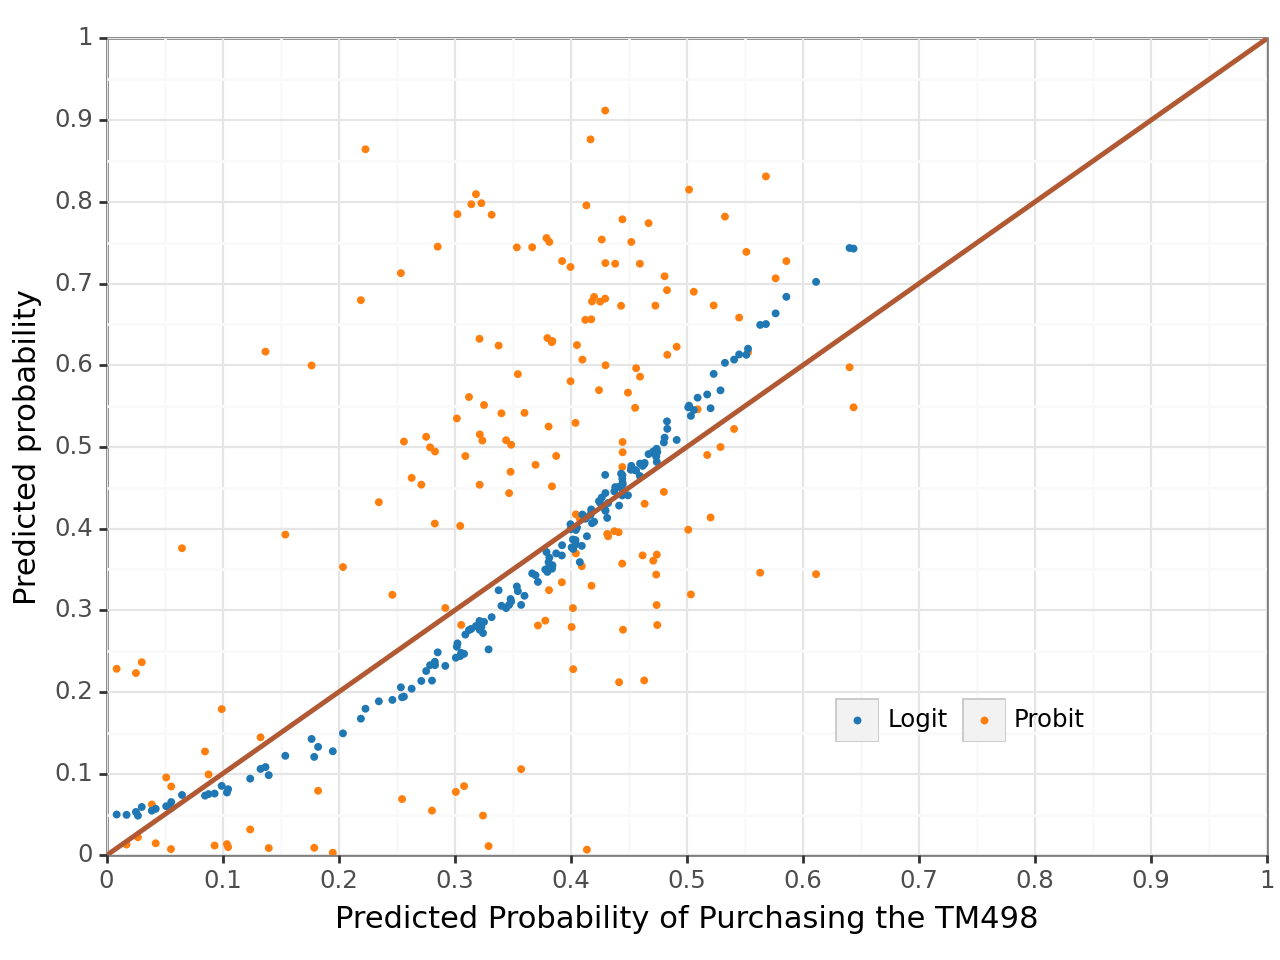

In [18]:
# Conducting the LPM
lpm1 = smf.ols(
    "TM498 ~ Female + Age + Education + Partnered + Usage + Fitness + lnIncome + lnMiles",
    data = data,
).fit(covtype="HC1")

# LPM predictive descriptives
data["pred_lpm"] = lpm1.predict()
print("\n" + "-"*55 + "\n")
print("LPM Predtive Probability Descriptives:")
print(data["pred_lpm"].describe().round(4))

# Logit Model
y, X = dmatrices(
    "TM498 ~ Female + Age + Education + Partnered + Usage + Fitness + lnIncome + lnMiles",
    data,
)

logit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit = logit.fit()

data["pred_logit"] = logit.predict()
print("\n" + "-"*55 + "\n")
print("Logit Predtive Probability Descriptives:")
print(data["pred_logit"].describe())
print("\n" + "-"*55 + "\n")

logit = sm.Logit(y, X)
logit_result = logit.fit()
print("\n" + "-"*55 + "\n")

print(logit_result.summary())
logit_margef_results = logit_result.get_margeff()
print("\n" + "-"*55 + "\n")
print(logit_margef_results.summary())
print("\n" + "-"*55 + "\n")


# Probit Model
print("Probit Predtive Probability Descriptives:")
data["pred_probit"] = probit_result.predict()
print(data["pred_probit"].describe())
print("\n" + "-"*55 + "\n")

probit = sm.Probit(y, X)
probit_result = probit.fit()
print("\n" + "-"*55 + "\n")
print(probit_result.summary())

probit_margef_results = probit_result.get_margeff()
print("\n" + "-"*55 + "\n")
print(probit_margef_results.summary())
print("\n" + "-"*55 + "\n")


# LPM, Logit, Probit Plot
df_plot = pd.melt(
    data[["pred_lpm", "pred_logit", "pred_probit"]].rename(
        columns={"pred_logit": "Logit", "pred_probit": "Probit"}
    ),
    value_vars=["Logit", "Probit"],
    id_vars=["pred_lpm"],
).sort_values(by=["variable"], ascending=False)


color = ["#1f77b4", "#ff7f0e", "#b15933"]

g1 = (
    ggplot(df_plot, aes(x="pred_lpm", y="value", color="variable"))
    + geom_point(size=0.6)
    + geom_abline(color=color[2], intercept=0, slope=1, size=1)
    + labs(
        x="Predicted Probability of Purchasing the TM498", y="Predicted probability"
    )
    + scale_y_continuous(expand=[0.00, 0.0], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + scale_x_continuous(expand=[0.00, 0.0], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + scale_color_manual(values=[color[0], color[1]])
    + theme_bw()
    + theme(
        legend_title=element_blank(),
        legend_direction="horizontal",
        legend_position=(0.75, 0.25),
        legend_background=element_blank(),
    )
)
print(g1)


### TM798 Customer Profile
---


-------------------------------------------------------

LPM Predtive Probability Descriptives:
count    180.0000
mean       0.2222
std        0.3662
min       -0.3643
25%       -0.0355
50%        0.1129
75%        0.3124
max        1.1870
Name: pred_lpm, dtype: float64

-------------------------------------------------------

Logit Predtive Probability Descriptives:
count     1.800000e+02
mean      2.222222e-01
std       4.168994e-01
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%      3.618012e-150
max       1.000000e+00
Name: pred_logit, dtype: float64

-------------------------------------------------------

         Current function value: 0.000001
         Iterations: 100

-------------------------------------------------------

                           Logit Regression Results                           
Dep. Variable:                  TM798   No. Observations:                  180
Model:                          Logit   Df Residuals:                  

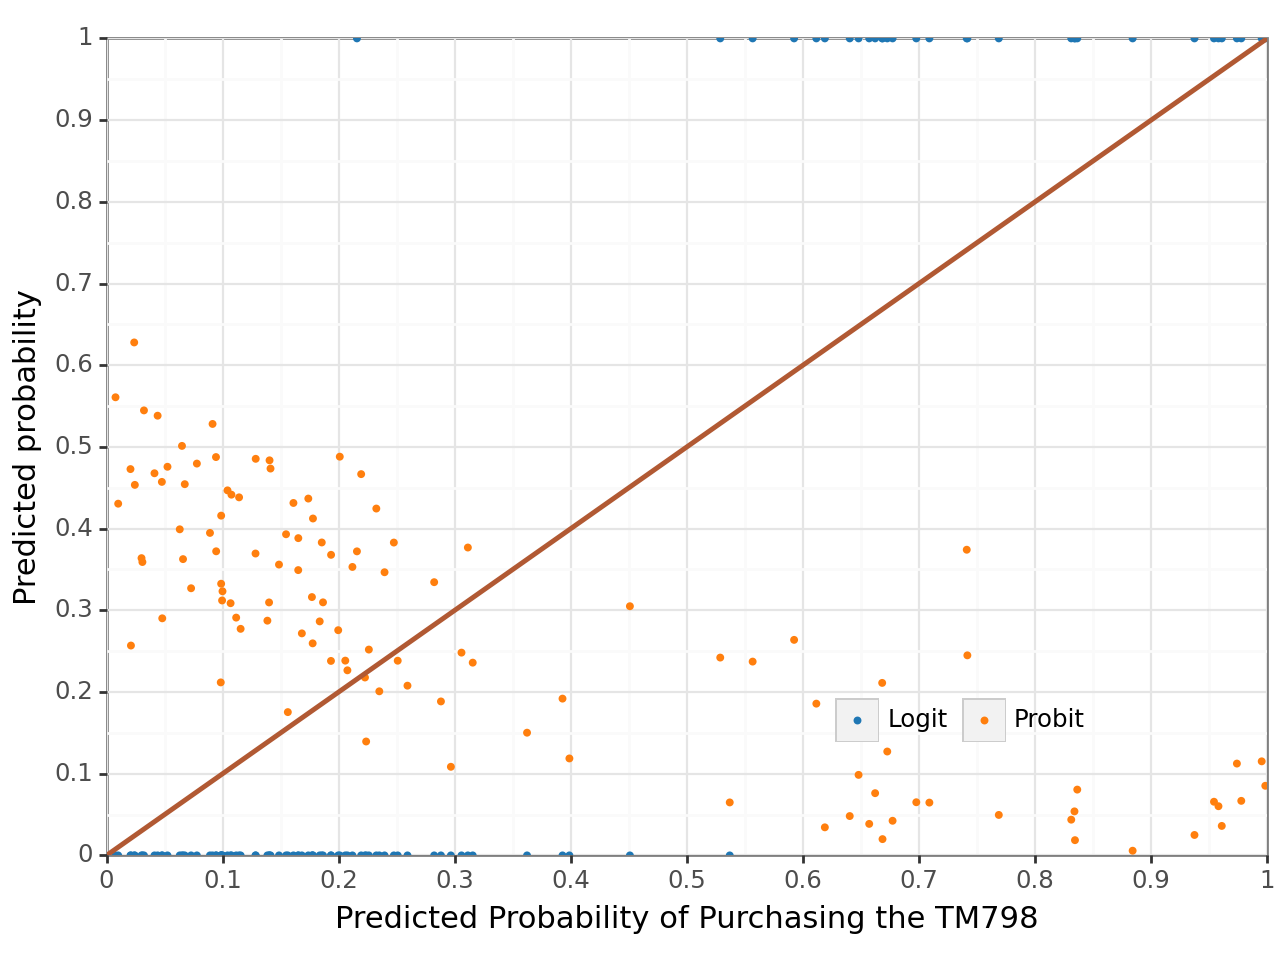

In [19]:
# Conducting the LPM
lpm1 = smf.ols(
    "TM798 ~ Age + Education + Usage + Fitness + lnIncome + lnMiles",
    data = data,
).fit(covtype="HC1")

# LPM predictive descriptives
data["pred_lpm"] = lpm1.predict()
print("\n" + "-"*55 + "\n")
print("LPM Predtive Probability Descriptives:")
print(data["pred_lpm"].describe().round(4))


# Logit Model
y, X = dmatrices(
    "TM798 ~ Age + Education + Usage + Fitness + lnIncome + lnMiles",
    data,
)

logit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit = logit.fit()

data["pred_logit"] = logit.predict()
print("\n" + "-"*55 + "\n")
print("Logit Predtive Probability Descriptives:")
print(data["pred_logit"].describe())
print("\n" + "-"*55 + "\n")

logit = sm.Logit(y, X)
logit_result = logit.fit(maxiter=100)
print("\n" + "-"*55 + "\n")

print(logit_result.summary())
logit_margef_results = logit_result.get_margeff()
print("\n" + "-"*55 + "\n")
print(logit_margef_results.summary())
print("\n" + "-"*55 + "\n")


# Probit Model
print("Probit Predtive Probability Descriptives:")
data["pred_probit"] = probit_result.predict()
print(data["pred_probit"].describe())
print("\n" + "-"*55 + "\n")

probit = sm.Probit(y, X)
probit_result = probit.fit()
print("\n" + "-"*55 + "\n")
print(probit_result.summary())

probit_margef_results = probit_result.get_margeff()
print("\n" + "-"*55 + "\n")
print(probit_margef_results.summary())
print("\n" + "-"*55 + "\n")


# LPM, Logit, Probit Plot
df_plot = pd.melt(
    data[["pred_lpm", "pred_logit", "pred_probit"]].rename(
        columns={"pred_logit": "Logit", "pred_probit": "Probit"}
    ),
    value_vars=["Logit", "Probit"],
    id_vars=["pred_lpm"],
).sort_values(by=["variable"], ascending=False)


color = ["#1f77b4", "#ff7f0e", "#b15933"]

g1 = (
    ggplot(df_plot, aes(x="pred_lpm", y="value", color="variable"))
    + geom_point(size=0.6)
    + geom_abline(color=color[2], intercept=0, slope=1, size=1)
    + labs(
        x="Predicted Probability of Purchasing the TM798", y="Predicted probability"
    )
    + scale_y_continuous(expand=[0.00, 0.0], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + scale_x_continuous(expand=[0.00, 0.0], limits=[0, 1], breaks=np.arange(0, 1.1, 0.1))
    + scale_color_manual(values=[color[0], color[1]])
    + theme_bw()
    + theme(
        legend_title=element_blank(),
        legend_direction="horizontal",
        legend_position=(0.75, 0.25),
        legend_background=element_blank(),
    )
)
print(g1)


---
# Interpretation and Customer Profiles
---

### TM798
- Due to multicolinniarity, the Female and Partnered binary variables were dropps